In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("HW4.ipynb")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Homework #4

In this homework, you will get to practice the computation of maximum likelihood estimates and bootstrap confidence intervals.

<!-- BEGIN QUESTION -->

## Problem 1: MLE for Laplace Distribution

You are given 10 points $\{ 0.19529091,  0.93106584,  0.15147936, -0.43860253,  0.15290169,
       -1.18712532, -0.2587244 , -1.67139275, -0.55631196, -2.11156991\}$ that were drawn i.i.d. from Laplace distribution with scale 1, which has the probability density function $f(x|\theta) = \frac{1}{2}e^{-|x - \theta|},$ where $\theta$ is the unknown parameter you want to estimate. What are the likelihood and the log-likelihood functions for this problem? Can you use the derivative test to obtain a maximum likelihood estimate for $\theta$? 
       
Using the data provided in the paragraph above, plot the log-likelihood function and deduce the MLE of $\theta.$ Is MLE unique for this problem?

$f(x|\theta) = (1/2) e ^{-|x-\theta|}$

likelihood function, $f(x_1, x_2, x_3...x_{10}|\theta) = ((1/2) e ^{-|x_1-\theta|})((1/2) e ^{-|x_2-\theta|}) ...
((1/2) e ^{-|x_{10}-\theta|}) = (\frac{1}{2^{10}}) e^{-|x_1-\theta|-|x_2 - \theta|...-|x_{10}-\theta|}$  

Log likelihood function:
$L(\theta) = log(1/2^{10}) - [|x_1-\theta|+|x_2 - \theta|...+|x_{10}-\theta|] = 10(-log2 - \frac{1}{10}\sum_{i=1}^{n} |x_i-\theta|)$

we can not use derivative methos here as $|x_i-\theta|$ is a chain term and we won't get rid of it.

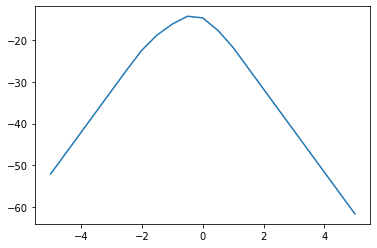

In [3]:
x = [0.19529091,0.93106584,0.15147936,-0.43860253,0.15290169,-1.18712532,-0.2587244,-1.67139275,-0.55631196,-2.11156991]
y = -5
theta = []
ll = []
while y <= 5:
    theta.append(y)
    val = 0
    for i in x:
        val += abs(i-y)
    val /= (-10)
    val += (-math.log(2))
    val *= 10
    ll.append(val)
    y += 0.5
plt.plot(theta,ll)
    

MLE of $\theta$ is little less than 0 (a little bit left of 0 actually). Yes, it is unique.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Problem 2: MLE for Poisson Distribution

The following points have been drawn from Poisson distribution with the unknown parameter $\lambda:$ $\{4, 5, 3, 2, 4, 7, 5, 5, 2, 2\}.$ What is the log-likelihood function for estimating $\lambda$?

1. Compute the MLE of $\lambda.$
2. [Extra Credit, 5pts] Suppose that we know that $\lambda \geq 4.5.$ Find the MLE of $\lambda.$
3. [Extra Credit, 5pts] Suppose that we know that $\lambda$ is an integer. Find the MLE of $\lambda.$ 

1. 
likelihood function, 
$L(\lambda) = \frac{\lambda^{x1}e^{-\lambda}}{x_{1!}} * \frac{\lambda^{x2}e^{-\lambda}}{x_2!}...\frac{\lambda^{x10}e^{-\lambda}}{x_{10}!} = e^{-10\lambda} \lambda^{x_1+x_2+...x_{10}}(\frac{1}{x_{1!}}*\frac{1}{x_{2!}}...\frac{1}{x_{10!}})$ 

log likelihood,
$L(p) = -10\lambda + (x_1+x_2+...x_{10})log(\lambda) + log(1/x_{1!}) + log(1/x_{2!}) +...+ log(1/x_{10!})$

first derivative = $-10 + (x_1+x_2+...x_{10})\frac{1}{\lambda}$ = 0
==> $\lambda = 3.9$

second derivative is negative $(x_1+x_2+...x_{10})(-1)\lambda^{-2}$

2. 
From the previous question, 
first derivative = $-10 + (x_1+x_2+...x_{10})\frac{1}{\lambda}$
For a range of $\lambda[4.5,\inf]$, there is no value of $\lambda$ that provides first derivative = 0. 
So we can say there is no local minima. So the mle would be 4.5. 

let's take some intervals of $\lambda$ and the first derivative of a point in the interval:

a point(4.3), $[4,4.5] -> \bar{f}= decrease (neg val)$

a point(4.6), $[4.5,5] -> \bar{f}= decrease (neg val)$

a point(5.5), $[5,\inf] -> \bar{f}= decrease (neg val)$

So it is a decresing function. So the mle would be 4.5 as the subsequent points are giving decreasing likelihood.

For the integer value of $\lambda$,  

let's take some intervals of $\lambda$ and the first derivative of a point in the interval:

a point(1.5), $[1,2] -> \bar{f}= increase (pos val)$

a point(2.5), $[2,3] -> \bar{f}= increase (pos val)$

a point(3.5), $[3,4] -> \bar{f}= increase (pos val)$

a point(4.5), $[4,5] -> \bar{f}= decrease (neg val)$

a point(5.5), $[5,\inf] -> \bar{f}= decrease (neg val)$

as the likelihood function increase before 4 and decreases after 4, there is a relative maxima at 4.
So the mle for integer value is 4.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Problem 3: Empirical Distribution as MLE

Suppose you are given $n > 10$ data points drawn i.i.d. from some unknown distribution and that take values from the set $\{1, 2, \dots, 10\}.$ Show that the empirical distribution of your data sample is the MLE for individual probabilities of the points from the set $\{1, 2, \dots, 10\}.$

The probability distribution of each individual point is a binomial distribution.
Let's say, a1 = no of occurrence of x1,
The joint probability of empirical distribution, 
$P(x1, x2, ... x10|\theta) = P(x1|p1) * P(x2|p2)...* P(x10|p10) = {n \choose a1}(p1^{a1})(1-p1)^{n-a1} * {n \choose a2}(p2^{a2})(1-p2)^{n-a2} ... {n \choose a10}(p10^{a10})(1-p10)^{n-a10}$
$Log(P) = log{n \choose a1} + a1*log(p1) + (n-a1)*log(1-p1) + log{n \choose a2} + a2*log(p2) + (n-a2)*log(1-p2) .... $

Taking the partial derivation with respect to $p1$ we get the mle of $p1$,
$\frac{a1}{p1} - \frac{n-a1}{1-p1} = 0$
=> $\frac{1-p1}{p1} = \frac{n-a1}{a1}$
=> $p1 = \frac{a1}{n}$, which is the mle of individual probability of x1.

For x2, x3..x10, we will get mle p2=a2/n, p3= a3/n..p10=a10/n which is same for individual probabilities of the points.



Another way to prove(maybe):
Let, $f(a)$ = no of times a was drawn in the empirical distribution

empirical distribution of a, $\hat{p}(a) = \frac{1}{n}f(a)----(1)$

For individual data points(say a), the empirical distribution is a binomial distribution where n = # of sample and
x = # of times a was drawn with an unknown parameter p,
mle, $\hat{p} = \frac{x}{n},$ which is same as equation no (1).

<!-- END QUESTION -->

## Problem 4: The Bootstrap

When we take a random sample from the population to estimate some parameter, we only obtain one estimate value among numerous plausible estimates, because our random sample is just one of numerous possible random samples. Fortunately, a brilliant idea called *the bootstrap* can help, which generates new random samples by resampling. **In this question, you are asked to use the bootstrap to estimate the median of the US family incomes in 2017.**

Below is the data of the US family incomes in 2017 extracted from the website of *US Census Bureau*. Among all these features of each family, we are interested in **estimating the median of the family incomes**. We can fetch the data of total family income by the column name `FTOTVAL`.

In [4]:
data = pd.read_csv("hw4_data.csv")

In [5]:
print("num of families: ", data.shape[0])
print("num of features: ", data.shape[1])
data.head()

num of families:  81087
num of features:  85


,GESTCEN,GTCBSA,FPOVCUT,FPERSONS,FHEADIDX,FSPOUIDX,FOWNU6,FRELU6,FKIND,FTYPE,...,F_MV_FS,F_MV_SL,I_FHIPVAL,I_FHIPVAL2,I_FMEDVAL,I_FMOOP,I_FMOOP2,I_FOTCVAL,POVLL,MMYY
0,11,0,16543,2,1,0,0,0,3,1,...,984,0,0,0,0,0,0,0,4,32017
1,11,0,14507,2,1,2,0,0,1,1,...,0,0,1,1,1,1,1,1,7,32017
2,11,0,24755,4,1,2,0,0,1,1,...,0,599,0,0,0,0,0,0,8,32017
3,11,0,16072,2,1,2,0,0,1,1,...,0,0,1,1,0,1,1,0,14,32017
4,11,0,24339,4,1,2,1,1,1,1,...,0,599,1,1,1,1,1,1,8,32017


Let this dataset of $81087$ rows be our population, and here is a histogram of the family income in this table.

<AxesSubplot:>

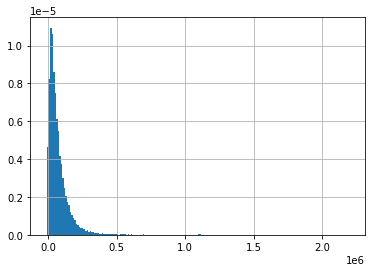

In [6]:
data["FTOTVAL"].hist(bins=200, density=1)

While most of values lie in around $50000$ dollars, some may go very high. That is why the horizontal axis stretches quite far to the right of the visible bars. Note that some values may be nagative, which means that some families did not have income but only loss in 2017.

### Median of the Population

Of course, the data provided in this question does not capture the entire population of US households. Nevertheless, to illustrate the performance of bootstrap, in the following we will "imagine" that the dataset corresponds to the entire population and will then look at a smaller sample of the data.

1. Since we have the luxury of all the data in the population, we can directly compute the parameter-median-we wanted. **Write a function which computes the median of the family income from the above dataset.**

In [7]:
def median_of_income(df, label):
    """
    Parameters
    ----------
    df: pandas.DataFrame
        varibale name of the DataFrame of data.
    label: string
        column that indicates the family income: "FTOTVAL" here.

    Returns
    -------
    float
        the median of the family income in 2017.
    """
    #print(df[label].median()) ##49833.0
    return df[label].median()

In [8]:
grader.check("p4-1")

p4-1 results: All test cases passed!

<!-- BEGIN QUESTION -->

### A Random Sample and an Estimate

From now on, let us draw a random sample of 1000 families without replacement, and assume we do not have the whole population at hand (although we have computed the *true* median from the population for reference). Here is the random sample I draw from the dataset.

In [9]:
our_sample = data.sample(n=1000, replace=False, random_state=0)
our_sample

,GESTCEN,GTCBSA,FPOVCUT,FPERSONS,FHEADIDX,FSPOUIDX,FOWNU6,FRELU6,FKIND,FTYPE,...,F_MV_FS,F_MV_SL,I_FHIPVAL,I_FHIPVAL2,I_FMEDVAL,I_FMOOP,I_FMOOP2,I_FOTCVAL,POVLL,MMYY
66552,87,36260,12486,1,1,0,0,0,2,2,...,0,0,0,0,0,0,0,0,8,32017
64608,85,10740,12486,1,1,0,0,0,2,2,...,0,0,0,0,0,0,0,0,1,32017
65671,86,38060,32070,6,1,2,1,1,1,1,...,4560,1796,0,0,0,0,0,0,2,32017
52386,73,0,14507,2,1,0,0,0,2,1,...,0,0,0,0,0,0,0,0,3,32017
80551,95,46520,24755,4,1,2,0,0,1,1,...,0,0,3,3,3,3,3,3,14,32017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,21,35620,16543,2,1,0,0,0,3,1,...,0,599,0,0,0,0,0,0,5,32017
57078,74,26420,11511,1,1,0,0,0,2,2,...,0,0,0,0,0,0,0,0,5,32017
64661,85,22140,12486,1,1,0,0,0,2,2,...,1560,0,0,0,0,0,0,0,1,32017
78436,93,42220,12486,1,2,0,0,0,2,5,...,0,0,0,0,0,0,0,0,13,32017


2. Use the function `median_of_income` in **Q3-1** to compute the median $\bar{x}_{\text{median}}$ of the family income in the new sample. Is it comparable to the median $x_{\text{median}}$ we obtained from the whole population? Briefly discuss why.

In [10]:
print(median_of_income(our_sample, "FTOTVAL"))

48683.0


Yes, it is comparable. 1k difference I think not much significant.

<!-- END QUESTION -->

### The Bootstrap: Resampling from the Sample

Now we have one estimate of the median. Note that if we had the sample come out differently, the estimate would have had a different value. So we would like to quantify the variation of the estimate, which measures how accurately we can estimate the parameter. We can use *the bootstrap* to generate another random sample that resembles the population by the following steps: 
- Treat the original sample as if it were the population,
- Draw the new sample **of the same size as the original sample size**, at random **with replacement**, from the original sample.

Note that it is important to resample the same number of times as the original sample size, because we need to measure the variability of an estimate with the same sample size. Also, to avoid arriving at the same sample, we resample data with replacement. 

3. Write a function that returns one bootstrapped median $\bar{x}^*_{\text{median}}$ of the family income, based on bootstrapping the original random sample that we called `our_sample`. 

In [11]:
def one_bootstrap_median(original_sample, label, random_state):
    """
    Parameters
    ----------
    sample: pandas.DataFrame
        varibale name of the DataFrame of the original sample, "our_sample" here.
    label: string
        column that indicates the family income: "FTOTVAL" here.
    random_state: int
        random seed used to determine the randomness when resampling.

    Returns
    -------
    float
        the median of the family income in 2017 of the bootstrapped sample.
    """
    our_sample = original_sample.sample(n=len(original_sample), replace=True, random_state=random_state)
    #print(median_of_income(our_sample, label))
    return median_of_income(our_sample, label)

In [12]:
grader.check("p4-3")

p4-3 results: All test cases passed!

### Bootstrap Empirical Distribution of the Sample Median

We now repeat the bootstrap process multiple times by running a `for` loop to obtain a bootstrap Empirical Distribution.

4. Write a function that collects an array of bootstrapped medians, one from each bootstrap sample, for `num_repetitions` times. In the $i$-th bootstrap process, set `random_state = i`, where $i = 0, 1, \dots,$ `num_repetitions`.

In [13]:
def bootstrap_median(original_sample, label, num_repetitions):
    """
    Parameters
    ----------
    sample: pandas.DataFrame
        varibale name of the DataFrame of the original sample, "our_sample" here.
    label: string
        column that indicates the family income: "FTOTVAL" here.
    random_state: int
        random seed used to determine the randomness when resampling.

    Returns
    -------
    np.array
        the array of bootstrapped medians.
    """
    i = 0
    a = []
    while(i<num_repetitions):
        a.append(one_bootstrap_median(original_sample, label, random_state=i))
        i += 1
    return np.array(a)
        

In [14]:
grader.check("p4-4")

p4-4 results: All test cases passed!

<!-- BEGIN QUESTION -->

5. Draw the empirical histogram of the bootstrapped medians for $5000$ repetitions, and check whether the **population median** obtained in **Q3-2** lies in the estimated $95\%$ bootstrap confidence interval $[\bar{x}_{\text{median}} - \delta^*_{.025}, \bar{x}_{\text{median}} - \delta^*_{.975}]$ for the median, which tells you whether your estimation process captures the parameter. Note that here we use $\delta^* = \bar{x}^*_{\text{median}} - \bar{x}_{\text{median}}$ derived from bootstrapping to approximate the true $\delta = \bar{x}_{\text{median}} - x_{\text{median}}$ to get the confidence interval.

Hint: To get the "$95\%$ bootstrap confidence interval", use `np.percentile()` to compute the two ends $\delta^*_{.025}$ and $\delta^*_{.975}$ at the $97.5\%$ and $2.5\%$ percentiles respectively for $\bar{x}^*_{\text{median}} - \bar{x}_{\text{median}}$. 

<AxesSubplot:>

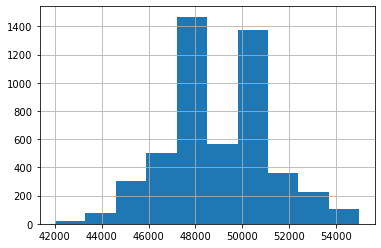

In [15]:
""" to be implemented """
dis = bootstrap_median(our_sample, label="FTOTVAL", num_repetitions=5000)
dist = pd.DataFrame({'test_stat':dis})
dist['test_stat'].hist()

In [16]:
xbar_med = median_of_income(our_sample, "FTOTVAL")

dist['test_stat'] = dist['test_stat'] - xbar_med
dist = dist.sort_values(by=['test_stat'])
#print(dist['test_stat'])
print(np.percentile(dist['test_stat'],2.5))
print(np.percentile(dist['test_stat'],97.5))
print("CI ",xbar_med - np.percentile(dist['test_stat'],97.5), xbar_med - np.percentile(dist['test_stat'],2.5))
print("population median ",data['FTOTVAL'].median())
##It does not include the population median which is 49833.0.
print("CI includes the population median")

-3683.0
4703.0
CI  43980.0 52366.0
population median  49833.0
CI includes the population median


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Going Beyond

We can further go beyond what we have done so far! Assume that there are $100$ people who get random samples (different from each other) from the population, and these people compute their own bootstrap empirical distributions based on the random samples they get. How many times will the process of estimation we did above  capture the parameter (the population median)?

6. Draw $100$ random samples of size $1000$ families from the population `data`, and set `random_state=i` at $i$-th draw. For each random sample, compute the array of the bootstrapped medians for 5000 repetitions (same random state setting as in **Q3-4**). Compute how many times the population median lies in the estimated $95\%$ bootstrap confidence interval for the median in the bootstrap process.

In [17]:
left_ends = np.zeros(100)
right_ends = np.zeros(100)

for i in np.arange(100):
    original_sample = data.sample(1000, replace=False, random_state=i)
    est_median = np.median(original_sample['FTOTVAL'])
    medians = bootstrap_median(original_sample,"FTOTVAL", 5000)
    left_ends[i] = est_median - np.percentile(medians - est_median, 97.5)
    right_ends[i] = est_median - np.percentile(medians - est_median, 2.5)


intervals = pd.DataFrame({
    'Left': left_ends,
    'Right': right_ends
}) 
pop_median = data['FTOTVAL'].median()
intervals.loc[(intervals["Left"] <= pop_median) & (intervals["Right"] >= pop_median)]
#i = intervals[intervals['Left'] <= pop_median]
#i = i[i['Right'] >= pop_median]
#print(len(i))

,Left,Right
0,43980.0000,52366.000
1,46539.9750,54000.000
2,48361.5000,54512.000
3,47701.4875,57253.500
4,46975.0000,56001.000
...,...,...
94,45145.0000,53757.000
96,45130.0000,54345.000
97,46486.0125,57241.000
98,47475.9625,53732.500


90 times the population median lies in the estimated  95%  bootstrap confidence interval for the median in the bootstrap process.



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [18]:
grader.check_all()

p4-1 results: All test cases passed!

p4-3 results: All test cases passed!

p4-4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Please download the zip file after running the cell below, then upload the zip file to GradeScope for submission. You can also download your notebook as an IPYNB file for the submission. Please also export your notebook as a PDF file (Use **Command/Control + P** if you have issues with the native export as PDF feature). **Please upload and submit both the IPYNB file and the PDF via Gradescope (entry code: GEWXGD).**

In [19]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)